#カロリーを簡単に表示をするアプリ

###まずは画像収集から
flickrAPIを使用して画像収集をする

In [0]:
# Google ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd drive/My Drive/project_calorie
!mkdir images

/content/drive/My Drive/project_calorie
mkdir: cannot create directory ‘images’: File exists


In [0]:
!pip3 install flickrapi

     |████████████████████████████████| 61kB 10.2MB/s 


In [0]:
from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

#APIキーとシークレットキー
key = 'FlickrAPIのAPIキーを入れる'
secret = 'FlickrAPIのシークレットキーを入れる'
wait_time = 1

def main():
    go_download('マグロ寿司', 'sushi')
    go_download('サラダ', 'salad')
    go_download('麻婆豆腐', 'tofu')

def go_download(keyword, dir):
    savedir = './images/all_data/' + dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
        text = keyword,
        per_page = 300,
        media = 'photos',
        sort = 'relevance',
        extras = 'url_q, license')
    
    photos = res['photos']
    pprint(photos)
    
    try:
      # 1枚ずつ画像をダウンロード
      for i, photo in enumerate(photos['photo']):
        url_q = photo['url_q']
        filepath = savedir + '/' + photo['id'] + '.jpg'
        if os.path.exists(filepath): continue
        print(str(i + 1) + ":download=", url_q)
        urlretrieve(url_q, filepath)
        time.sleep(wait_time)
    except:
      import traceback
      traceback.print_exc()

if __name__ == '__main__':
    main()


###ダウンロードした画像を確認
いらない画像は削除する。各種100枚にする<br>
その後、<br>
train 70枚<br>
validation 20枚<br>
test 10枚<br>
に分ける


In [0]:
import glob, os

dir_list = os.listdir('./images/all_data')

for d in dir_list:
    path_list = glob.glob('./images/all_data/' + d + '/*')
    print(d, len(path_list))

sushi 100
salad 100
tofu 100


#### train,validation,testディレクトリを作り、画像をコピー

In [0]:
import shutil

original_dataset_dir = './images/all_data'
base_dir = './images'

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#trainデータ
train_salad_dir = os.path.join(train_dir, 'salad')
os.mkdir(train_salad_dir)
train_sushi_dir = os.path.join(train_dir, 'sushi')
os.mkdir(train_sushi_dir)
train_tofu_dir = os.path.join(train_dir, 'tofu')
os.mkdir(train_tofu_dir)

#validationデータ
validation_salad_dir = os.path.join(validation_dir, 'salad')
os.mkdir(validation_salad_dir)
validation_sushi_dir = os.path.join(validation_dir, 'sushi')
os.mkdir(validation_sushi_dir)
validation_tofu_dir = os.path.join(validation_dir, 'tofu')
os.mkdir(validation_tofu_dir)

#testデータ
test_salad_dir = os.path.join(test_dir, 'salad')
os.mkdir(test_salad_dir)
test_sushi_dir = os.path.join(test_dir, 'sushi')
os.mkdir(test_sushi_dir)
test_tofu_dir = os.path.join(test_dir, 'tofu')
os.mkdir(test_tofu_dir)

#saladデータをtrain,validation,testに分ける
fnames = os.listdir(os.path.join(original_dataset_dir, 'salad'))[0:70]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'salad', fname)
    dst = os.path.join(train_salad_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'salad'))[70:90]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'salad', fname)
    dst = os.path.join(validation_salad_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'salad'))[90:100]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'salad', fname)
    dst = os.path.join(test_salad_dir, fname)
    shutil.copyfile(src, dst)


#sushiデータをtrain,validation,testに分ける
fnames = os.listdir(os.path.join(original_dataset_dir, 'sushi'))[0:70]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'sushi', fname)
    dst = os.path.join(train_sushi_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'sushi'))[70:90]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'sushi', fname)
    dst = os.path.join(validation_sushi_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'sushi'))[90:100]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'sushi', fname)
    dst = os.path.join(test_sushi_dir, fname)
    shutil.copyfile(src, dst)
    

#tofuデータをtrain,validation,testに分ける
fnames = os.listdir(os.path.join(original_dataset_dir, 'tofu'))[0:70]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'tofu', fname)
    dst = os.path.join(train_tofu_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'tofu'))[70:90]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'tofu', fname)
    dst = os.path.join(validation_tofu_dir, fname)
    shutil.copyfile(src, dst)

fnames = os.listdir(os.path.join(original_dataset_dir, 'tofu'))[90:100]
for fname in fnames:
    src = os.path.join(original_dataset_dir, 'tofu', fname)
    dst = os.path.join(test_tofu_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#枚数を確認
print('train_salad', len(os.listdir('./images/train/salad')))
print('train_sushi', len(os.listdir('./images/train/sushi')))
print('train_tofu', len(os.listdir('./images/train/tofu')))
print('validation_salad', len(os.listdir('./images/validation/salad')))
print('validation_sushi', len(os.listdir('./images/validation/sushi')))
print('validation_tofu', len(os.listdir('./images/validation/tofu')))
print('test_salad', len(os.listdir('./images/test/salad')))
print('test_sushi', len(os.listdir('./images/test/sushi')))
print('test_tofu', len(os.listdir('./images/test/tofu')))

train_salad 70
train_sushi 70
train_tofu 70
validation_salad 20
validation_sushi 20
validation_tofu 20
test_salad 10
test_sushi 10
test_tofu 10


### モデルを定義

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(32,
          kernel_size=(3, 3),
          activation='relu',
          input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
__________

### 水増し+学習

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Found 210 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Epoch 1/20
100/100 [==============================] - 12s 123ms/step - loss: 0.9609 - acc: 0.5367 - val_loss: 0.9826 - val_acc: 0.5500
Epoch 2/20
100/100 [==============================] - 11s 111ms/step - loss: 0.6906 - acc: 0.7360 - val_loss: 0.5763 - val_acc: 0.7333
Epoch 3/20
100/100 [==============================] - 11s 110ms/step - loss: 0.5560 - acc: 0.7902 - val_loss: 0.4860 - val_acc: 0.8333
Epoch 4/20
100/100 [==============================] - 11s 110ms/step - loss: 0.5033 - acc: 0.8078 - val_loss: 0.5782 - val_acc: 0.8167
Epoch 5/20
100/100 [==============================] - 11s 110ms/step - loss: 0.4289 - acc: 0.8356 - val_loss: 0.4101 - val_acc: 0.8667
Epoch 6/20
100/100 [==============================] - 12s 118ms/step - loss: 0.3733 - acc: 0.8572 - val_loss: 0.6481 - val_acc: 0.8167
Epoch 7/20
100/100 [==============================] - 11s 110ms/step - loss: 0.3643 - acc: 0.8742 - val_loss:

#### 重みを保存

In [0]:
model.save('calorie_1.h5')

### テスト

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

labels = ['サラダ', '寿司', '麻婆豆腐']
calories = [118, 588, 648 ]

model.load_weights('calorie_1.h5')

def check_photo(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize((32, 32))
    plt.imshow(img)
    plt.show()
    x = np.asarray(img)
    x = x.reshape(-1, 32, 32, 3)
    x = x / 255

    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx]*100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    print('この写真は、', labels[idx], 'で、カロリーは', calories[idx], 'kcal')
    print('可能性は、', per, '％です。')

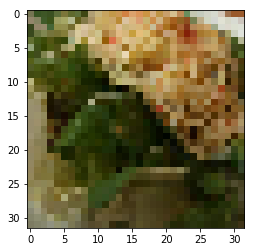

この写真は、 サラダ で、カロリーは 118 kcal
可能性は、 99 ％です。


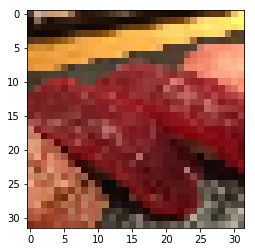

この写真は、 寿司 で、カロリーは 588 kcal
可能性は、 99 ％です。


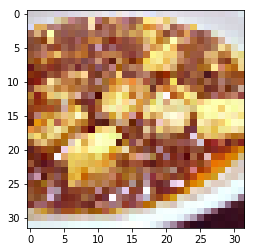

この写真は、 麻婆豆腐 で、カロリーは 648 kcal
可能性は、 100 ％です。


In [0]:
test_salad_list = glob.glob(test_salad_dir + '/*')
test_sushi_list = glob.glob(test_sushi_dir + '/*')
test_tofu_list = glob.glob(test_tofu_dir + '/*')

check_photo_str(test_salad_list[0])
check_photo_str(test_sushi_list[1])
check_photo_str(test_tofu_list[2])